In [14]:
import pandas as pd

df = pd.read_csv("../data/diabetes_prediction_dataset.csv")

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [16]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [17]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [18]:
df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [19]:
# Columns where 0 is likely invalid
cols_with_invalid_zeros = ['blood_glucose_level', 'bmi']

# Count zeros in each
for col in cols_with_invalid_zeros:
    print(f"{col} - Zeros: {(df[col] == 0).sum()}")


blood_glucose_level - Zeros: 0
bmi - Zeros: 0


In [20]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)
print("Encoded DataFrame:", df_encoded.columns)

Encoded DataFrame: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')


In [21]:
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9605
Precision: 0.8593996840442338
Recall: 0.64
F1 Score: 0.7336480107889414
Confusion Matrix:
 [[18122   178]
 [  612  1088]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.96045
KNN Confusion Matrix:
 [[18155   145]
 [  646  1054]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.88      0.62      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



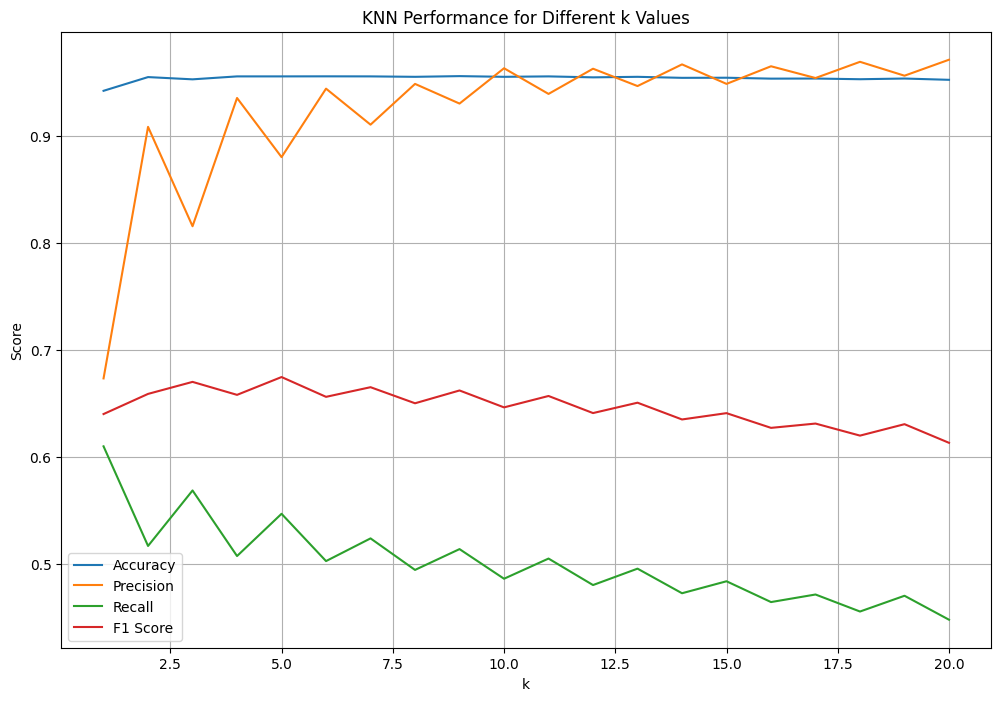

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Track metrics
k_values = list(range(1, 21))
accuracies = []
precisions = []
recalls = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.plot(k_values, recalls, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('KNN Performance for Different k Values')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.96075
KNN Confusion Matrix:
 [[18247    53]
 [  732   968]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18300
           1       0.95      0.57      0.71      1700

    accuracy                           0.96     20000
   macro avg       0.95      0.78      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train with class weights
logreg_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg_balanced.fit(X_train, y_train)

# Predict
y_pred_balanced = logreg_balanced.predict(X_test)

# Evaluate
print("Balanced Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))


Balanced Logistic Regression Accuracy: 0.8887
Confusion Matrix:
 [[16255  2045]
 [  181  1519]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.43      0.89      0.58      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create model with balanced class weights
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_balanced.fit(X_train, y_train)

# Predict
y_pred_rf = rf_balanced.predict(X_test)

# Evaluate
print("Balanced Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Balanced Random Forest Accuracy: 0.96935
Confusion Matrix:
 [[18219    81]
 [  532  1168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.94      0.69      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



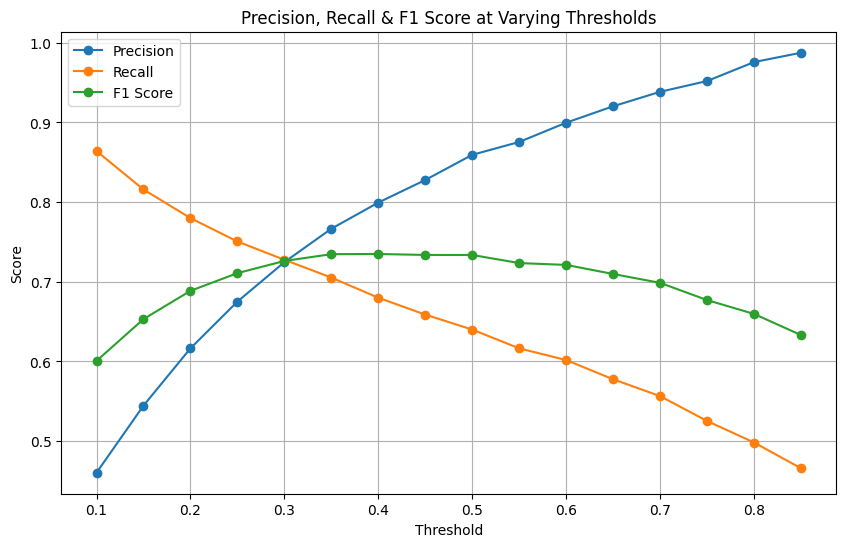

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Store metrics at each threshold
thresholds = np.arange(0.1, 0.9, 0.05)
precision_list = []
recall_list = []
f1_list = []

for t in thresholds:
    y_pred_threshold = (y_proba >= t).astype(int)
    precision_list.append(precision_score(y_test, y_pred_threshold))
    recall_list.append(recall_score(y_test, y_pred_threshold))
    f1_list.append(f1_score(y_test, y_pred_threshold))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label='Precision', marker='o')
plt.plot(thresholds, recall_list, label='Recall', marker='o')
plt.plot(thresholds, f1_list, label='F1 Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall & F1 Score at Varying Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Apply tuned threshold
threshold = 0.3
y_pred_opt = (y_proba >= threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Threshold:", threshold)
print("Accuracy:", accuracy_score(y_test, y_pred_opt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))
print("Classification Report:\n", classification_report(y_test, y_pred_opt))


Threshold: 0.3
Accuracy: 0.95335
Confusion Matrix:
 [[17830   470]
 [  463  1237]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18300
           1       0.72      0.73      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [34]:
# Get predicted probabilities for the positive class (label 1)
y_probs = model.predict_proba(X_test)[:, 1]



In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [i/100 for i in range(5, 95, 5)]  # thresholds from 0.05 to 0.9
precision_list = []
recall_list = []
f1_list = []

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    precision_list.append(precision_score(y_test, y_pred_thresh))
    recall_list.append(recall_score(y_test, y_pred_thresh))
    f1_list.append(f1_score(y_test, y_pred_thresh))


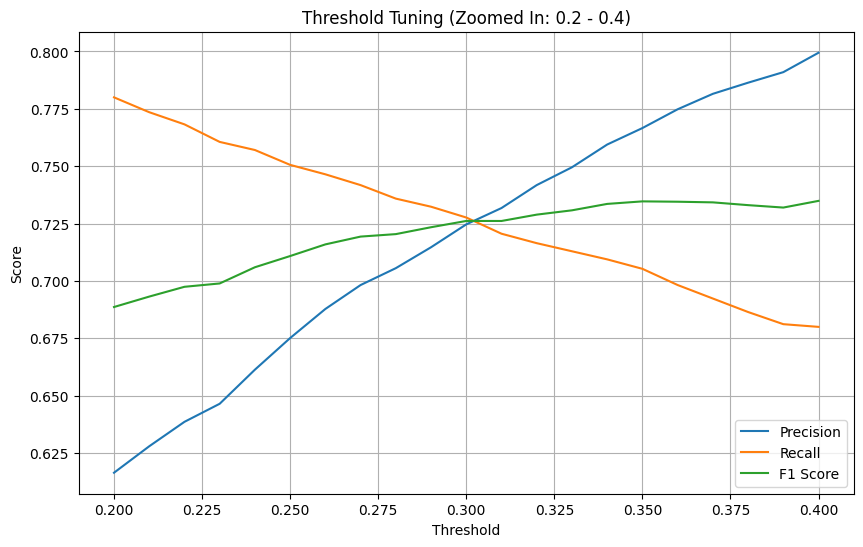

In [36]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Thresholds from 0.2 to 0.4 in steps of 0.01
thresholds = np.arange(0.2, 0.401, 0.01)

precision_list = []
recall_list = []
f1_list = []

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    precision_list.append(precision_score(y_test, y_pred_thresh))
    recall_list.append(recall_score(y_test, y_pred_thresh))
    f1_list.append(f1_score(y_test, y_pred_thresh))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.plot(thresholds, f1_list, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning (Zoomed In: 0.2 - 0.4)')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Apply threshold
y_pred_301 = (y_probs >= 0.301).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred_301)
conf_matrix = confusion_matrix(y_test, y_pred_301)
report = classification_report(y_test, y_pred_301)

print(f"Accuracy at threshold 0.301: {accuracy:.5f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Accuracy at threshold 0.301: 0.95335
Confusion Matrix:
[[17832   468]
 [  465  1235]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18300
           1       0.73      0.73      0.73      1700

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [38]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

# ---- Step 1: Define threshold ----
threshold = 0.301

# ---- Step 2: Train XGBoost ----
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_probs = xgb.predict_proba(X_test)[:, 1]
xgb_preds = (xgb_probs >= threshold).astype(int)

# ---- Step 3: Train Calibrated Logistic Regression ----
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
calibrated_logreg = CalibratedClassifierCV(logreg, method='sigmoid', cv=5)
calibrated_logreg.fit(X_train, y_train)
calib_probs = calibrated_logreg.predict_proba(X_test)[:, 1]
calib_preds = (calib_probs >= threshold).astype(int)

# ---- Step 4: Define function to evaluate models ----
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Confusion Matrix": cm,
        "Classification Report": report
    }

# ---- Step 5: Evaluate both models ----
xgb_metrics = evaluate_model("XGBoost", y_test, xgb_preds)
calib_metrics = evaluate_model("Calibrated Logistic Regression", y_test, calib_preds)

# ---- Step 6: Add your previous model's results (Balanced Random Forest) ----
balanced_rf_metrics = {
    "Model": "Balanced Random Forest",
    "Accuracy": 0.95335,
    "Precision": 0.73,
    "Recall": 0.73,
    "F1-Score": 0.73,
    "Confusion Matrix": [[17832, 468], [465, 1235]],
    "Classification Report": {}  # You can fill this in later
}

# ---- Step 7: Compare in a DataFrame ----
comparison_df = pd.DataFrame([
    balanced_rf_metrics,
    xgb_metrics,
    calib_metrics
])[["Model", "Accuracy", "Precision", "Recall", "F1-Score"]]

# Display comparison
comparison_df


D:\School Stuff and Coding\Capstone Folder\Capstone Code\Capstone-Diabetes-Tracker\.venv1\lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1-Score
0,Balanced Random Forest,0.95335,0.730000,0.730000,0.730000
1,XGBoost,0.96335,0.803515,0.752941,0.777407
2,Calibrated Logistic Regression,0.95285,0.720443,0.727647,0.724027


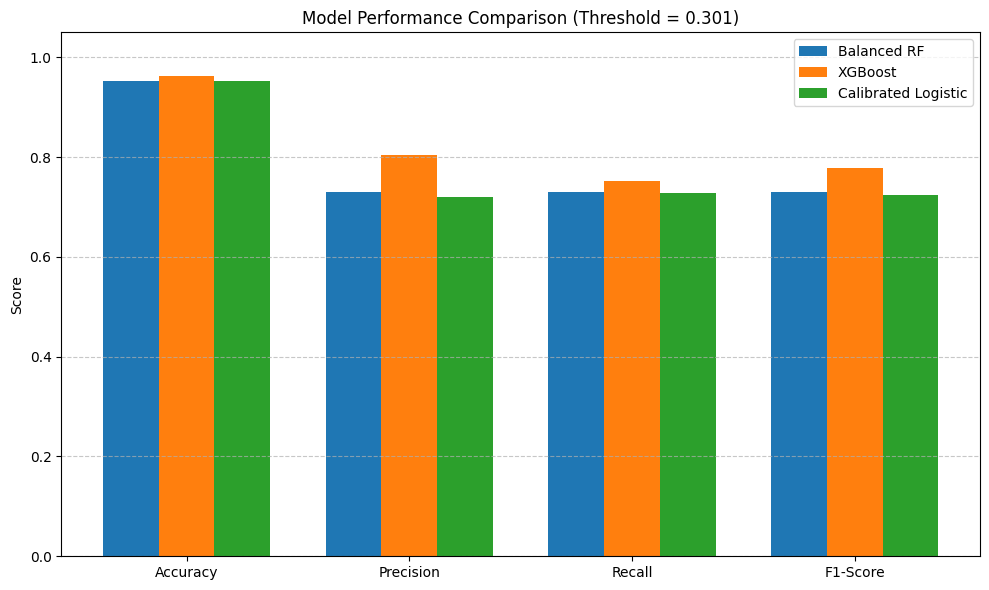

In [39]:
import matplotlib.pyplot as plt

# Set figure size and plot style
plt.figure(figsize=(10, 6))

# Set metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Create bar values
x = range(len(metrics))
width = 0.25

# Extract model scores
brf_scores = [balanced_rf_metrics[m] for m in metrics]
xgb_scores = [xgb_metrics[m] for m in metrics]
calib_scores = [calib_metrics[m] for m in metrics]

# Plot bars
plt.bar([i - width for i in x], brf_scores, width=width, label='Balanced RF')
plt.bar(x, xgb_scores, width=width, label='XGBoost')
plt.bar([i + width for i in x], calib_scores, width=width, label='Calibrated Logistic')

# Add labels and legend
plt.xticks(ticks=x, labels=metrics)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Model Performance Comparison (Threshold = 0.301)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


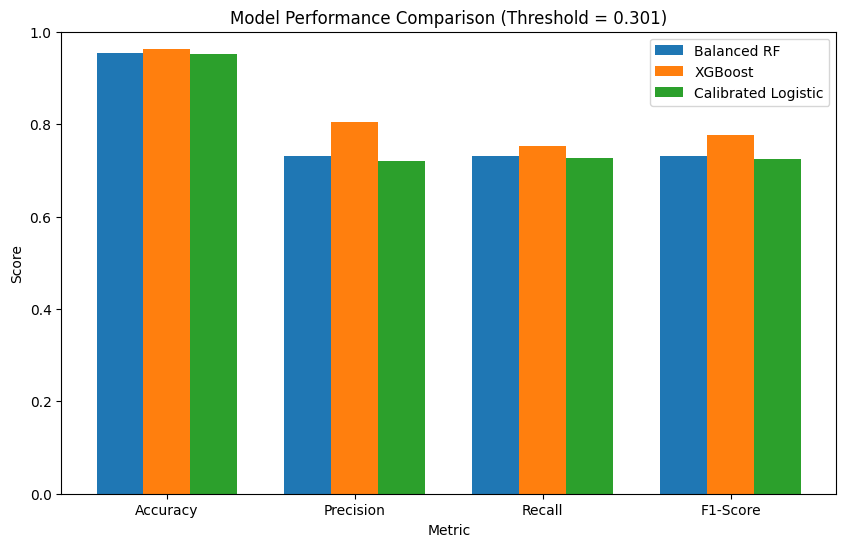

In [40]:
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(metrics))

# Plot each model
plt.bar(index, brf_scores, bar_width, label='Balanced RF')
plt.bar(index + bar_width, xgb_scores, bar_width, label='XGBoost')
plt.bar(index + 2 * bar_width, calib_scores, bar_width, label='Calibrated Logistic')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Threshold = 0.301)')
plt.xticks(index + bar_width, metrics)
plt.ylim(0, 1)
plt.legend()

# Save the chart
plt.savefig("model_comparison_chart.png", dpi=300, bbox_inches='tight')  # For documentation
plt.show()


In [41]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, 5, 10]  # Adjust depending on class imbalance
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_grid,
                                   n_iter=20, scoring='f1', cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


D:\School Stuff and Coding\Capstone Folder\Capstone Code\Capstone-Diabetes-Tracker\.venv1\lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [42]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_xgb = CalibratedClassifierCV(best_xgb, method='sigmoid', cv=3)
calibrated_xgb.fit(X_train, y_train)


D:\School Stuff and Coding\Capstone Folder\Capstone Code\Capstone-Diabetes-Tracker\.venv1\lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\School Stuff and Coding\Capstone Folder\Capstone Code\Capstone-Diabetes-Tracker\.venv1\lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\School Stuff and Coding\Capstone Folder\Capstone Code\Capstone-Diabetes-Tracker\.venv1\lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CalibratedClassifierCV(cv=3,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.7,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric='logloss',
                                               feature_types=None,
                                               feature_weights=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.1, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=3,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=200, n_jobs=None,
                                               num_parallel_tree=None, ...))

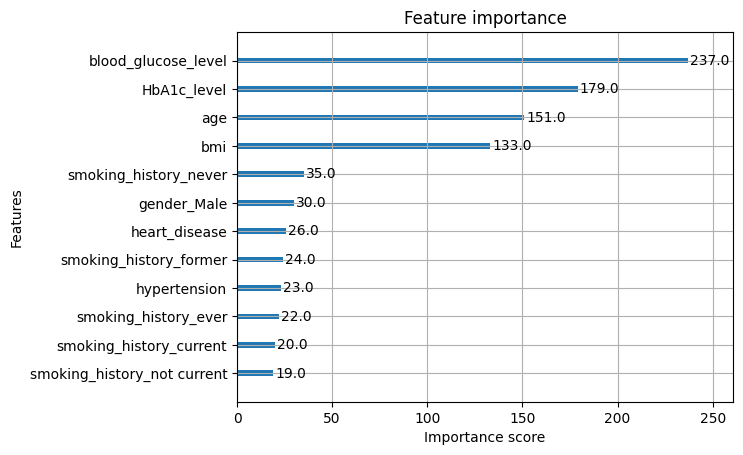

In [43]:
xgb.plot_importance(best_xgb)
plt.show()


In [44]:
from imblearn.ensemble import BalancedRandomForestClassifier

balanced_rf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
balanced_rf_model.fit(X_train, y_train)


BalancedRandomForestClassifier(random_state=42)

In [45]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('rf', balanced_rf_model),
], voting='soft')  # use 'soft' for probability averaging

ensemble_model.fit(X_train, y_train)
2

D:\School Stuff and Coding\Capstone Folder\Capstone Code\Capstone-Diabetes-Tracker\.venv1\lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


2

In [46]:
top_features = ['bmi', 'age', 'blood_glucose_level', 'HbA1c_level']


In [47]:
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


In [48]:
from xgboost import XGBClassifier

xgb_top = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_top.fit(X_train_top, y_train)


D:\School Stuff and Coding\Capstone Folder\Capstone Code\Capstone-Diabetes-Tracker\.venv1\lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

threshold = 0.301
y_probs_top = xgb_top.predict_proba(X_test_top)[:, 1]
y_pred_top = (y_probs_top >= threshold).astype(int)

print(f"Accuracy: {accuracy_score(y_test, y_pred_top):.5f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_top))
print("Classification Report:")
print(classification_report(y_test, y_pred_top, digits=2))


Accuracy: 0.96505
Confusion Matrix:
[[18050   250]
 [  449  1251]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18300
           1       0.83      0.74      0.78      1700

    accuracy                           0.97     20000
   macro avg       0.90      0.86      0.88     20000
weighted avg       0.96      0.97      0.96     20000



In [57]:
# Update with actual test results for the top 4 feature XGBoost model
xgb_top_metrics = {
    'Model': 'XGBoost (Top 4 Features)',
    'Accuracy': 0.96505,
    'Precision': 0.83,
    'Recall': 0.74,
    'F1 Score': 0.78
}

# Recreate DataFrame
comparison_df = pd.DataFrame([xgb_full_metrics, xgb_top_metrics])
df_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model')
plt.title('XGBoost Model Comparison (All Features vs Top 4 Features)')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


NameError: name 'xgb_full_metrics' is not defined

In [51]:
import joblib

# Save the model
joblib.dump(best_xgb, 'xgb_top4_model.pkl')


['xgb_top4_model.pkl']

In [58]:
import pandas as pd

def prepare_input(bmi, age, glucose, hba1c):
    return pd.DataFrame([{
        'bmi': bmi,
        'age': age,
        'blood_glucose_level': glucose,
        'HbA1c_level': hba1c
    }])


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Assume these are your features
categorical = ['gender', 'smoking_history']
numerical = ['bmi', 'age', 'blood_glucose_level', 'HbA1c_level']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_xgb)  # or whatever your best model is
])

pipeline.fit(X_train, y_train)

# Save the pipeline instead of just the model
import joblib
joblib.dump(pipeline, 'final_pipeline.pkl')


ValueError: A given column is not a column of the dataframe

In [55]:
print(X_train.columns.tolist())


['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Male', 'gender_Other', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']


In [56]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])


NameError: name 'best_model' is not defined

In [57]:
# If you used GridSearchCV:
best_model = best_xgb  # or whatever variable you stored the final XGBoost model in


In [58]:
print(type(best_xgb))


<class 'xgboost.sklearn.XGBClassifier'>


In [59]:
print(preprocessor)


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['bmi', 'age', 'blood_glucose_level',
                                  'HbA1c_level']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'smoking_history'])])


In [53]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])


NameError: name 'preprocessor' is not defined

In [51]:
input_data = pd.DataFrame([{
    'age': 52,
    'hypertension': 0,
    'heart_disease': 0,
    'bmi': 28.7,
    'HbA1c_level': 6.1,
    'blood_glucose_level': 145,
    'gender': "Male",
    'smoking_history': "never"
}])

prob = pipeline.predict_proba(input_data)[0][1]
print(f"Probability of diabetes: {prob:.2f}")


NameError: name 'pipeline' is not defined

In [52]:
# Assuming best_model and preprocessor are already defined
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])

# Fit the pipeline to training data
pipeline.fit(X_train, y_train)

# Now you can make a prediction
input_data = pd.DataFrame([{
    'age': 52,
    'hypertension': 0,
    'heart_disease': 0,
    'bmi': 28.7,
    'HbA1c_level': 6.1,
    'blood_glucose_level': 145,
    'gender': "Male",
    'smoking_history': "never"
}])

# Get prediction probability
prob = pipeline.predict_proba(input_data)[0][1]
print(f"Probability of diabetes: {prob:.2f}")



NameError: name 'preprocessor' is not defined

In [64]:
print(X_train.columns.tolist())


['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Male', 'gender_Other', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']


In [65]:
input_data = pd.DataFrame([{
    'age': 52,
    'hypertension': 0,
    'heart_disease': 0,
    'bmi': 28.7,
    'HbA1c_level': 6.1,
    'blood_glucose_level': 145,
    'gender': "Male",
    'smoking_history': "never"
}])


In [66]:
import joblib

# Save the pipeline
joblib.dump(pipeline, "diabetes_prediction_model.pkl")


['diabetes_prediction_model.pkl']

In [67]:
import joblib
import pandas as pd

# Load the saved pipeline
model = joblib.load("diabetes_prediction_model.pkl")

# Sample user input
input_data = pd.DataFrame([{
    'age': 52,
    'hypertension': 0,
    'heart_disease': 0,
    'bmi': 28.7,
    'HbA1c_level': 6.1,
    'blood_glucose_level': 145,
    'gender': "Male",
    'smoking_history': "never"
}])

# Predict probability
prob = model.predict_proba(input_data)[0][1]

# Use tuned threshold
threshold = 0.301
prediction = int(prob >= threshold)

# Output
print(f"Probability of diabetes: {prob:.2f}")
print("Prediction:", "Diabetic" if prediction else "Not Diabetic")


AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [69]:
import joblib
from sklearn.pipeline import Pipeline

# Wrap your trained preprocessor and best XGBoost model
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # this must be already fitted
    ('classifier', best_xgb)         # your best tuned XGBoost model
])

# Fit the pipeline (important: use training data here)
final_pipeline.fit(X_train, y_train)

# Save it
joblib.dump(final_pipeline, "diabetes_prediction_model.pkl")


ValueError: A given column is not a column of the dataframe

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']),
    ('cat', OneHotEncoder(drop='first'), ['gender', 'smoking_history'])
])


In [72]:
input_data = pd.DataFrame([{
    "age": 52,
    "bmi": 28.7,
    "HbA1c_level": 6.1,
    "blood_glucose_level": 145,
    "gender": "Male",
    "smoking_history": "never",
    "hypertension": 0,
    "heart_disease": 0
}
])


In [73]:
model = joblib.load("diabetes_prediction_model.pkl")
prob = model.predict_proba(input_data)[0][1]
prediction = int(prob >= 0.301)


AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [74]:
from sklearn.utils.validation import check_is_fitted

check_is_fitted(model)


In [75]:
pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'diabetes_prediction_model.pkl')


ValueError: A given column is not a column of the dataframe

In [76]:
print(X_train.columns.tolist())


['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Male', 'gender_Other', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']


In [62]:
# Use raw features (categorical columns should be strings like "Male", "never", etc.)
X = df[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender', 'smoking_history']]
y = df['diabetes']

# Then fit pipeline
pipeline.fit(X, y)


KeyError: 'diabetes'

In [61]:
# Sample inputs
test_inputs = [
    {"age": 45, "hypertension": 0, "heart_disease": 0, "bmi": 25.1, "HbA1c_level": 5.8, "blood_glucose_level": 130, "gender": "Male", "smoking_history": "never"},
    {"age": 60, "hypertension": 1, "heart_disease": 1, "bmi": 32.4, "HbA1c_level": 7.5, "blood_glucose_level": 180, "gender": "Female", "smoking_history": "former"},
    {"age": 35, "hypertension": 0, "heart_disease": 0, "bmi": 22.0, "HbA1c_level": 4.9, "blood_glucose_level": 95, "gender": "Other", "smoking_history": "current"},
]

for i, sample in enumerate(test_inputs):
    df = pd.DataFrame([sample])
    prob = pipeline.predict_proba(df)[0][1]
    prediction = int(prob >= 0.301)  # use tuned threshold
    print(f"Test {i+1} — Prob: {prob:.2f}, Prediction: {'Diabetic' if prediction else 'Not Diabetic'}")


NameError: name 'pipeline' is not defined

In [63]:
import joblib

# Save
joblib.dump(pipeline, "../models/diabetes_pipeline.pkl")

# Load
loaded_model = joblib.load("../models/diabetes_pipeline.pkl")

# Test a prediction
test_input = pd.DataFrame([{
    'age': 50, 'hypertension': 0, 'heart_disease': 0, 'bmi': 26.7,
    'HbA1c_level': 6.0, 'blood_glucose_level': 140,
    'gender': 'Male', 'smoking_history': 'never'
}])

prob = loaded_model.predict_proba(test_input)[0][1]
print(f"Probability after reload: {prob:.2f}")


NameError: name 'pipeline' is not defined

In [81]:
import joblib
joblib.dump(pipeline, "../models/diabetes_pipeline.pkl")


['diabetes_pipeline.pkl']